###Урок 7. Многомерный статистический анализ. Линейная регрессия

####1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
def get_mean(val):
  return val.sum() / len(val)

def get_mean_squared(val):
  meanSq = 0
  for i in X:
    meanSq += i**2

  return meanSq / len(X)  

def get_mean_twist(val1,val2):
    a = []
    for x,i in enumerate(val1):
      a.append(i*val2[x])
    return sum(a) / len(a)  

In [144]:
 zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
 ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

 X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
 y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [ ]:
np.corrcoef(zp,ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [147]:
b = (get_mean_twist(X,y) - get_mean(X) * get_mean(y)) / (get_mean_squared(X) - get_mean(X)**2)

2.620538882402765

In [130]:
# Второй способ нахождения b
np.cov(X,y,ddof=1)[0,1] / np.var(X, ddof=1)

2.620538882402765

In [148]:
a = get_mean(y) - b * get_mean(X)

444.1773573243596

#### from intercept

In [38]:
y_hat = a + b * X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [134]:
get_mean(y)

709.9

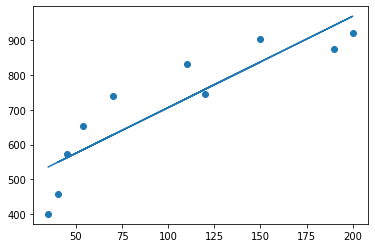

In [37]:
plt.scatter(X,y)
plt.plot(X,a+b*X)
plt.show()

In [39]:
mse = sum((y - y_hat)**2) / len(y)
mse

6470.41420117666

####without intercept

In [40]:
y_hat = b * X
y_hat

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

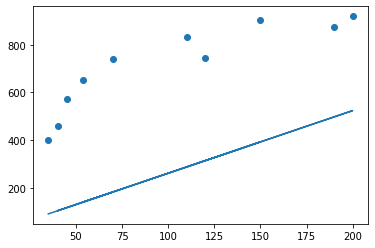

In [27]:
plt.scatter(X,y)
plt.plot(X,b*X)
plt.show()

In [41]:
mse = sum((y - y_hat)**2) / len(y)
mse

203763.93896082853

####2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [42]:
def mse_(B1,y=y,X=X,n=10):
  return np.sum(B1*X-y)/n

In [142]:
alpha = 0.0000001
B1 = 0.3
n = 10
for i in range(10000):
  B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
  mse = mse_(B1)
  # if mse < 0:
    # break
  if i%500==0:
    print(f'Iteration: {i}, B1={B1}, mse={mse}') 
print('Итоговый коэффицент В',B1)    

Iteration: 0, B1=0.315401744, mse=-677.9182631584
Iteration: 500, B1=4.486801063014902, mse=-254.93837221028897
Iteration: 1000, B1=5.536696008276913, mse=-148.47902476072096
Iteration: 1500, B1=5.80094292203127, mse=-121.68438770602923
Iteration: 2000, B1=5.867450939565606, mse=-114.94047472804755
Iteration: 2500, B1=5.884190269964989, mse=-113.24310662555006
Iteration: 3000, B1=5.888403373777239, mse=-112.81589789898798
Iteration: 3500, B1=5.889463765280916, mse=-112.70837420051512
Iteration: 4000, B1=5.889730654062013, mse=-112.68131167811194
Iteration: 4500, B1=5.889797827008256, mse=-112.67450034136282
Iteration: 5000, B1=5.88981473369384, mse=-112.67278600344461
Iteration: 5500, B1=5.889818988919098, mse=-112.6723545236035
Iteration: 6000, B1=5.889820059912101, mse=-112.67224592491293
Iteration: 6500, B1=5.8898203294691625, mse=-112.67221859182692
Iteration: 7000, B1=5.889820397313687, mse=-112.67221171239211
Iteration: 7500, B1=5.889820414389398, mse=-112.67220998091507
Iteratio

In [121]:
# B1 = 11.4
y_hat = B1 * X
y_hat

array([ 206.1437147 ,  265.04191891, 1119.06587982, 1177.96408402,
        235.5928168 ,  412.28742941,  318.05030269,  883.47306302,
        706.77845041,  647.88024621])

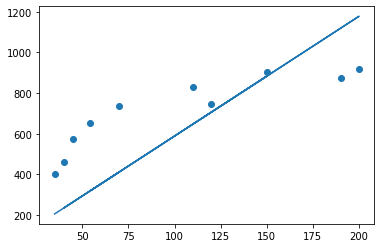

In [122]:
plt.scatter(X,y)
plt.plot(X,y_hat)
plt.show()

####3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

In [ ]:
#С помощью критерия Стьюдента можно оценить значимость отдельных коэффицентов..

####*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации). 

In [ ]:
# Постораюсь позже решить..